In [ ]:
# https://github.com/Suji04/ML_from_Scratch/blob/master/decision%20tree%20classification.ipynb
# https://machinelearningmastery.com/implement-decision-tree-algorithm-scratch-python/
# https://programmer.group/python-implementation-of-cart-decision-tree-algorithm-detailed-comments.html

In [285]:
# !pip install jupyter_contrib_nbextensions
# !jupyter contrib nbextension install --user
# !pip install jupyter_nbextensions_configurator
# !jupyter nbextensions_configurator enable --user

     ---------------------------------------- 23.5/23.5 MB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------- 481.7/481.7 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for jupyter_contrib_nbextensions: filename=jupyter_contrib_nbextensions-0.7.0-py2.py3-none-any.whl size=23428786 sha256=d3f95653f11d1ef3415be799486b503785a897b57a71d3594d84efcbf2dd9b5a
  Stored in directory: c:\users\ddeng\appdata\local\pip\cache\wheels\9c\57\38\7b0046dbc034aa0b2a5af0a26b60c08030f3ede6ca9cf568fa
  Created wheel for jupyter_contrib_core: filename=jupyter_contrib_core-0.4.2-py2.py3-none-any.whl size=17484 sha256=4e3aae728550d16493e518a4c4a5c50dd77b6e2a55d9b4dab41f3e387e31846c
  Stored in directory:

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [95 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creating build\lib\jupyter_nbextensions_configurator
  copying src\jupyter_nbextensions_configurator\application.py -> build\lib\jupyter_nbextensions_configurator
  copying src\jupyter_nbextensions_configurator\__init__.py -> build\lib\jupyter_nbextensions_configurator
  running egg_info
  writing src\jupyter_nbextensions_configurator.egg-info\PKG-INFO
  writing dependency_links to src\jupyter_nbextensions_configurator.egg-info\dependency_links.txt
  writing entry points to src\jupyter_nbextensions_configurator.egg-info\entry_points.txt
  writing requirements to src\jupyter_nbextensions_configurator.egg-info\requires.txt
  writing top-level names to src\jupyter_nbextensions_configurator.egg-info\top_level.txt
  reading manifest file 'src\jupyter_nbextensi

[I 21:37:09 InstallContribNbextensionsApp] jupyter contrib nbextension install --user
[I 21:37:09 InstallContribNbextensionsApp] Installing jupyter_contrib_nbextensions nbextension files to jupyter data directory
[I 21:37:09 InstallContribNbextensionsApp] Installing C:\Users\ddeng\anaconda3\lib\site-packages\jupyter_contrib_nbextensions\nbextensions\addbefore -> addbefore
[I 21:37:09 InstallContribNbextensionsApp] Making directory: C:\Users\ddeng\AppData\Roaming\jupyter\nbextensions\addbefore\
[I 21:37:09 InstallContribNbextensionsApp] Copying: C:\Users\ddeng\anaconda3\lib\site-packages\jupyter_contrib_nbextensions\nbextensions\addbefore\addbefore.yaml -> C:\Users\ddeng\AppData\Roaming\jupyter\nbextensions\addbefore\addbefore.yaml
[I 21:37:09 InstallContribNbextensionsApp] Copying: C:\Users\ddeng\anaconda3\lib\site-packages\jupyter_contrib_nbextensions\nbextensions\addbefore\icon.png -> C:\Users\ddeng\AppData\Roaming\jupyter\nbextensions\addbefore\icon.png
[I 21:37:09 InstallContribNbe

[I 21:37:09 InstallContribNbextensionsApp] Copying: C:\Users\ddeng\anaconda3\lib\site-packages\jupyter_contrib_nbextensions\nbextensions\export_embedded\export_embedded.yaml -> C:\Users\ddeng\AppData\Roaming\jupyter\nbextensions\export_embedded\export_embedded.yaml
[I 21:37:09 InstallContribNbextensionsApp] Copying: C:\Users\ddeng\anaconda3\lib\site-packages\jupyter_contrib_nbextensions\nbextensions\export_embedded\icon.png -> C:\Users\ddeng\AppData\Roaming\jupyter\nbextensions\export_embedded\icon.png
[I 21:37:09 InstallContribNbextensionsApp] Copying: C:\Users\ddeng\anaconda3\lib\site-packages\jupyter_contrib_nbextensions\nbextensions\export_embedded\main.js -> C:\Users\ddeng\AppData\Roaming\jupyter\nbextensions\export_embedded\main.js
[I 21:37:09 InstallContribNbextensionsApp] Copying: C:\Users\ddeng\anaconda3\lib\site-packages\jupyter_contrib_nbextensions\nbextensions\export_embedded\readme.md -> C:\Users\ddeng\AppData\Roaming\jupyter\nbextensions\export_embedded\readme.md
[I 21:37

## Import Packages

In [459]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from tqdm import tqdm
from tqdm.contrib import itertools
import plotly.express as px
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import matplotlib.pyplot as plt

In [253]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.under_sampling import RandomUnderSampler
from bs4 import BeautifulSoup
import re
from tqdm import tqdm
# import nltk
# nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
lemmatizer = WordNetLemmatizer()
from sklearn.decomposition import PCA
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
import nltk
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='bs4')

# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('punkt')

In [368]:
a=np.array([1,2,3])
list(a)

[1, 2, 3]

## Decision Tree

In [3]:
class Node():
    def __init__(self, feature_index=None, value=None, left=None, right=None, leaf_value=None):
        self.feature_index = feature_index
        self.value = value
        self.left = left
        self.right = right
        self.leaf_value = leaf_value

In [369]:
class DecisionTree():
    def __init__(self, max_depth=8, min_samples=10):
        self.root = None
        self.max_depth = max_depth
        self.min_samples = min_samples
        
    def gini_index(self, dataset):
        values, counts = np.unique(dataset[:, -1] , return_counts=True)
        size = dataset.shape[0]
        gini = 1.0
        for val, cnt in zip(values, counts):
            gini -= (cnt / size)**2
        return gini
    
    def split_dataset(self, dataset, index, value):
        left_dataset = np.array([row for row in dataset if row[index] <= value])
        right_dataset = np.array([row for row in dataset if row[index] > value])
        return left_dataset, right_dataset
    
    def get_best_split(self, dataset):
        best_split = {}
        best_split['gini'] = 1.0
        for index in range(dataset.shape[1] - 1):
            dataset = dataset[dataset[:, index].argsort()]  # sort dataset by 'index' column
            unique_values, cnts = np.unique(dataset[1:, -1], return_counts=True)
            left_dict = {}
            left_dict[dataset[0, index]] = 1
            right_dict = dict(zip(unique_values, cnts))
            left_gini, right_gini = 0.0, 1.0
            for val, cnt in zip(unique_values, cnts):
                right_gini -= (cnt / (dataset.shape[0] - 1))**2
            for i in range(1, dataset.shape[0] - 1):
                left_prev_size = i
                right_prev_size = dataset.shape[0] - left_prev_size
                left_cur_size = i + 1
                right_cur_size = dataset.shape[0] - left_cur_size
                cur_value = dataset[i, -1]
                if cur_value not in left_dict:
                    left_dict[cur_value] = 1
                    left_gini = (left_cur_size**2 - (left_prev_size**2 * (1 - left_gini) + 1)) / left_cur_size**2
                else:
                    left_gini = (left_cur_size**2 - (left_prev_size**2 * (1 - left_gini) - left_dict[cur_value]**2 + (left_dict[cur_value] + 1)**2)) / left_cur_size**2
                    left_dict[cur_value] += 1
                if right_dict[cur_value] == 1:
                    right_dict[cur_value] = 0
                    right_gini = (right_cur_size**2 - (right_prev_size**2 * (1 - right_gini) - 1)) / right_cur_size**2
                else:
                    right_gini = (right_cur_size**2 - (right_prev_size**2 * (1 - right_gini) - right_dict[cur_value]**2 + (right_dict[cur_value] - 1)**2)) / right_cur_size**2
                    right_dict[cur_value] -= 1
                gini = left_gini * left_cur_size / (float)(dataset.shape[0]) + right_gini * right_cur_size / (float)(dataset.shape[0])
                if gini < best_split['gini']:
                    best_split['gini'] = gini
                    best_split['index'] = index
                    best_split['value'] = dataset[i, index]
                    best_split['left_dataset'] = dataset[:i, :]
                    best_split['right_dataset'] = dataset[i:, :]
                        
        return best_split if best_split['gini'] < 1 else None
    
    def build_tree(self, dataset, cur_depth=0):
        num_samples = dataset.shape[0]
        if cur_depth < self.max_depth and num_samples >= self.min_samples:
            best_split = self.get_best_split(dataset)
            if best_split is not None:
                left = self.build_tree(best_split['left_dataset'], cur_depth + 1)
                right = self.build_tree(best_split['right_dataset'], cur_depth + 1)
                return Node(best_split['index'], best_split['value'], left, right)
        
        values, counts = np.unique(dataset[:, -1] , return_counts=True)
        return Node(leaf_value=values[counts.argmax()])
            
    def fit(self, X, Y):
        if Y.ndim == 1:
            Y = np.expand_dims(Y, axis=1)
        self.root = self.build_tree(np.concatenate((X, Y), axis=1))
        
    def predict(self, dataset):
        return np.array([self.record_prediction(record, self.root) for record in dataset])
        
    def record_prediction(self, record, node):
        if node.leaf_value is not None:
            return node.leaf_value
        if record[node.feature_index] <= node.value:
            return self.record_prediction(record, node.left)
        else:
            return self.record_prediction(record, node.right)
        
    def print_tree(self, node=None, cur_depth=0):
        if node is None:
            node = self.root
        if node.leaf_value is not None:
            print("|   "*cur_depth + "|--- Leaf Node Value: " + str(node.leaf_value))
        else:
            print("|   "*cur_depth + "|--- Split Feature Index: " + str(node.feature_index) + ",  Split Value: " + str(node.value))
            print("|   "*cur_depth + "|--- Left Node:")
            self.print_tree(node.left, cur_depth + 1)
            print("|   "*cur_depth + "|--- Right Node:")
            self.print_tree(node.right, cur_depth + 1)
            
    def get_metric_results(self, y_test, prediction):
        Y_test = y_test.tolist()
        metric_results = {}
        metric_results['accuracy'] = accuracy_score(Y_test, prediction)
        metric_results['f1_score'] = f1_score(Y_test, prediction, average="macro")
        metric_results['precision'] = precision_score(Y_test, prediction, average="macro")
        metric_results['recall'] = recall_score(Y_test, prediction, average="macro")
        return metric_results

    # print prediction metrics
    def report(self, prediction, y_test):
        Y_test = y_test.tolist()
        print('Confusion Matrix:')
        print(confusion_matrix(Y_test, prediction))
        print('Classification Report:')
        print(classification_report(Y_test, prediction))
            
    def grid_search(self, grid, X_train, Y_train, X_test=None, Y_test=None):
        max_depth_list = grid['max_depth']
        min_samples_list = grid['min_samples']
        
        if not max_depth_list:
            max_depth_list.append(8)
        if not min_samples_list:
            min_samples_list.append(10)
        
        if X_test is None or Y_test is None:
            X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

        summary = {}
        summary['best_f1_score'] = 0
        summary['history'] = []
        for max_depth, min_samples in itertools.product(max_depth_list, min_samples_list):                
            classifier = DecisionTree(max_depth, min_samples)
            classifier.fit(X=X_train, Y=Y_train)
            prediction = classifier.predict(X_test)
            metric_results = classifier.get_metric_results(Y=Y_test.tolist(), prediction=prediction)
            history = {}
            history['max_depth'] = max_depth
            history['min_samples'] = min_samples
            history['accuracy'] = metric_results['accuracy']
            history['f1_score'] = metric_results['f1_score']
            history['precision'] = metric_results['precision']
            history['recall'] = metric_results['recall']
            summary['history'].append(history)
            print("max_depth: " + str(max_depth) + ", min_samples: " + str(min_samples) + ", f1_score: " + str(metric_results['f1_score']))

            if metric_results['f1_score'] > summary['best_f1_score']:
                summary['best_f1_score'] = metric_results['f1_score']
                summary['best_max_depth'] = max_depth
                summary['best_min_samples'] = min_samples
        return summary

In [5]:
def fillna(df):
    for idx in range(df.shape[1]):
        mean_value = df.iloc[:, idx].mean()
        df.iloc[:, idx].fillna(value=mean_value, inplace=True)

In [6]:
def read_file(path):
    rawdata = pd.read_excel(path, header=0)
    return rawdata

def removeNAN(x_df, y_df):
    nan_idx = x_df[x_df['Phrase'].isnull()].index.tolist()
    print("NaN indices: " + str(nan_idx))
    x_df.drop(nan_idx, axis=0, inplace=True)
    y_df.drop(nan_idx, axis=0, inplace=True)

def preprocess_data(df):
    reviews = []
    for raw in tqdm(df['Phrase']):
        text = BeautifulSoup(raw, 'lxml').get_text()
        only_text = re.sub('[^a-zA-Z]', ' ', text)
        words = word_tokenize(only_text.lower())
        stops = set(stopwords.words('english'))
        non_stopwords = [word for word in words if not word in stops]
        lemma_words = [lemmatizer.lemmatize(word) for word in non_stopwords]    
        reviews.append(lemma_words)
    return reviews

def tokenizer_preprocess(list_X_train, list_X_val):
    unique_words = set()
    len_max = 0
    for sent in tqdm(list_X_train):
        unique_words.update(sent)
        if len_max < len(sent):
            len_max = len(sent)
    len(list(unique_words)), len_max

    tokenizer = Tokenizer(num_words=len(list(unique_words)))
    tokenizer.fit_on_texts(list(list_X_train))
     
    X_train = tokenizer.texts_to_sequences(list_X_train)
    X_train = sequence.pad_sequences(X_train, maxlen=len_max)

    X_val = tokenizer.texts_to_sequences(list_X_val)
    X_val = sequence.pad_sequences(X_val, maxlen=len_max)

    return X_train, X_val

def report(predictions, y_test):
    y_test = y_test.tolist()
    print('Accuracy: %s' % accuracy_score(y_test, predictions))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, predictions))
    print('Classification Report:')
    print(classification_report(y_test, predictions))

## Dataset1: Wine Quality Data Set (Multi-class classification) 

In [424]:
X_train_df = read_file('C:/Users/ddeng/thomas/Classification_Tree/Dataset1_train/X_train.xlsx')
X_train_df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.0,0.23,0.40,1.6,0.063,NaN,67.0,0.99520,3.50,0.63,11.1
1,7.8,0.60,0.26,2.0,0.080,31.0,131.0,0.99622,NaN,0.52,9.9
2,9.7,0.69,0.32,2.5,0.088,22.0,91.0,0.99790,3.29,0.62,10.1
3,12.0,0.38,0.56,2.1,0.093,6.0,24.0,0.99925,3.14,0.71,10.9
4,6.4,0.64,0.21,1.8,0.081,14.0,31.0,0.99689,3.59,0.66,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1018,7.0,0.54,0.09,2.0,0.081,NaN,16.0,0.99479,3.43,0.59,11.5
1019,10.2,NaN,0.48,NaN,0.052,5.0,9.0,0.99458,3.20,0.69,12.1
1020,7.8,0.53,0.04,1.7,0.076,17.0,31.0,0.99640,3.33,NaN,10.0
1021,7.3,0.43,0.24,2.5,0.078,27.0,67.0,0.99648,3.60,0.59,11.1


In [425]:
Y_train_df = read_file('C:/Users/ddeng/thomas/Classification_Tree/Dataset1_train/y_train.xlsx')
Y_train_df

,class
0,5
1,5
2,5
3,6
4,5
...,...
1018,6
1019,7
1020,6
1021,6


In [426]:
print(X_train_df.info())
print(Y_train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         958 non-null    float64
 1   volatile_acidity      979 non-null    float64
 2   citric_acid           963 non-null    float64
 3   residual_sugar        984 non-null    float64
 4   chlorides             971 non-null    float64
 5   free_sulfur_dioxide   966 non-null    float64
 6   total_sulfur_dioxide  978 non-null    float64
 7   density               977 non-null    float64
 8   pH                    965 non-null    float64
 9   sulphates             972 non-null    float64
 10  alcohol               965 non-null    float64
dtypes: float64(11)
memory usage: 88.0 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   cl

In [427]:
X_train_df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,958.000000,979.000000,963.000000,984.000000,971.000000,966.000000,978.000000,977.000000,965.000000,972.000000,965.000000
mean,8.373800,0.526118,0.274216,2.510010,0.087151,15.920807,45.801125,0.996776,3.308632,0.663580,10.445009
std,1.776455,0.176769,0.193308,1.270972,0.043777,10.158979,33.314198,0.001894,0.153336,0.176466,1.048401
min,4.600000,0.120000,0.000000,1.200000,0.012000,1.000000,6.000000,0.990200,2.740000,0.370000,8.400000
25%,7.100000,0.390000,0.100000,1.900000,0.071000,8.000000,22.000000,0.995650,3.210000,0.550000,9.550000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,37.000000,0.996800,3.310000,0.620000,10.200000
75%,9.300000,0.640000,0.430000,2.600000,0.091000,22.000000,60.000000,0.997870,3.400000,0.740000,11.100000
max,15.600000,1.330000,1.000000,15.400000,0.610000,66.000000,289.000000,1.003690,4.010000,2.000000,14.000000


In [428]:
fillna(X_train_df)
X_train_df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.0,0.230000,0.40,1.60000,0.063,15.920807,67.0,0.99520,3.500000,0.63000,11.100000
1,7.8,0.600000,0.26,2.00000,0.080,31.000000,131.0,0.99622,3.308632,0.52000,9.900000
2,9.7,0.690000,0.32,2.50000,0.088,22.000000,91.0,0.99790,3.290000,0.62000,10.100000
3,12.0,0.380000,0.56,2.10000,0.093,6.000000,24.0,0.99925,3.140000,0.71000,10.900000
4,6.4,0.640000,0.21,1.80000,0.081,14.000000,31.0,0.99689,3.590000,0.66000,10.445009
...,...,...,...,...,...,...,...,...,...,...,...
1018,7.0,0.540000,0.09,2.00000,0.081,15.920807,16.0,0.99479,3.430000,0.59000,11.500000
1019,10.2,0.526118,0.48,2.51001,0.052,5.000000,9.0,0.99458,3.200000,0.69000,12.100000
1020,7.8,0.530000,0.04,1.70000,0.076,17.000000,31.0,0.99640,3.330000,0.66358,10.000000
1021,7.3,0.430000,0.24,2.50000,0.078,27.000000,67.0,0.99648,3.600000,0.59000,11.100000


In [429]:
# accuracy: 0.697 -> 0.659
# def mod_outlier(df):
#     df1 = df.copy()
#     df = df._get_numeric_data()
#     q1 = df.quantile(0.25)
#     q3 = df.quantile(0.75)

#     iqr = q3 - q1

#     lower_bound = q1 - (1.5 * iqr) 
#     upper_bound = q3 + (1.5 * iqr)


#     for col in df.columns:
#         for i in range(0,len(df[col])):
#             if df[col][i] < lower_bound[col]:            
#                 df[col][i] = lower_bound[col]

#             if df[col][i] > upper_bound[col]:            
#                 df[col][i] = upper_bound[col]    


#     for col in df.columns:
#         df1[col] = df[col]

#     return df1

# X_train_df = mod_outlier(X_train_df)

### Plot scatter plots of features

In [140]:
# warning: There’s a limit of 8 scatter plots per page, due a limited number of WebGL contexts made available to the page by the browser.
for i in range(6):
    column_name = X_train_df.columns[i]
    fig = px.scatter(pd.concat((X_train_df, Y_train_df), axis=1), x=column_name, color='class', title=column_name)
    fig.update_layout(yaxis_title="Value")
    fig.show()

In [141]:
for i in range(6, 11):
    column_name = X_train_df.columns[i]
    fig = px.scatter(pd.concat((X_train_df, Y_train_df), axis=1), x=column_name, color='class', title=column_name)
    fig.update_layout(yaxis_title="Value")
    fig.show()

### Coefficient Correlation

In [142]:
corr = X_train_df.corr()
corr

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
fixed_acidity,1.000000,-0.256565,0.645935,0.113747,0.103324,-0.145762,-0.097585,0.642874,-0.636587,0.159224,-0.068793
volatile_acidity,-0.256565,1.000000,-0.518048,0.039565,0.065639,0.001447,0.091597,0.051761,0.230473,-0.212809,-0.192137
citric_acid,0.645935,-0.518048,1.000000,0.122657,0.182490,-0.067935,0.024459,0.333438,-0.520273,0.300167,0.129101
residual_sugar,0.113747,0.039565,0.122657,1.000000,0.069057,0.130930,0.212056,0.345886,-0.084809,0.019224,0.037235
chlorides,0.103324,0.065639,0.182490,0.069057,1.000000,0.016317,0.044135,0.213474,-0.241830,0.351741,-0.234949
free_sulfur_dioxide,-0.145762,0.001447,-0.067935,0.130930,0.016317,1.000000,0.617771,-0.038383,0.056575,0.042536,-0.085663
total_sulfur_dioxide,-0.097585,0.091597,0.024459,0.212056,0.044135,0.617771,1.000000,0.082191,-0.061468,0.047979,-0.199398
density,0.642874,0.051761,0.333438,0.345886,0.213474,-0.038383,0.082191,1.000000,-0.325180,0.125594,-0.482817
pH,-0.636587,0.230473,-0.520273,-0.084809,-0.241830,0.056575,-0.061468,-0.325180,1.000000,-0.188382,0.199665
sulphates,0.159224,-0.212809,0.300167,0.019224,0.351741,0.042536,0.047979,0.125594,-0.188382,1.000000,0.089074


In [430]:
# Over-sampling
# SMOTE: Accuracy 0.51 -> 0.71
# smote = SMOTE(random_state=42)
# feature, label = smote.fit_resample(X_train_df, Y_train_df)
# RandomOverSampler: Accuracy 0.72 -> 0.75
ros = RandomOverSampler(random_state=42)
feature, label = ros.fit_resample(X_train_df, Y_train_df)
print(Y_train_df.value_counts())
print(label.value_counts())

class
5        427
6        417
7        124
4         33
8         14
3          8
dtype: int64
class
3        427
4        427
5        427
6        427
7        427
8        427
dtype: int64


In [431]:
x = np.array(feature, dtype='object')
y = np.array(label, dtype='object')

In [432]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

# Normalization + PCA: accuracy 0.66 -> 0.697
# from sklearn.preprocessing import MinMaxScaler
# norm = MinMaxScaler(feature_range = (0, 1))
# norm.fit(x)
# x = norm.transform(x)

# But we will not use 'StandardScaler', because our dataset is not normally distributed. We will use 'MinMaxScaler' for normalizing this dataset. It transforms features by scaling each feature to a given range. This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between 0 and 1.

In [433]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)

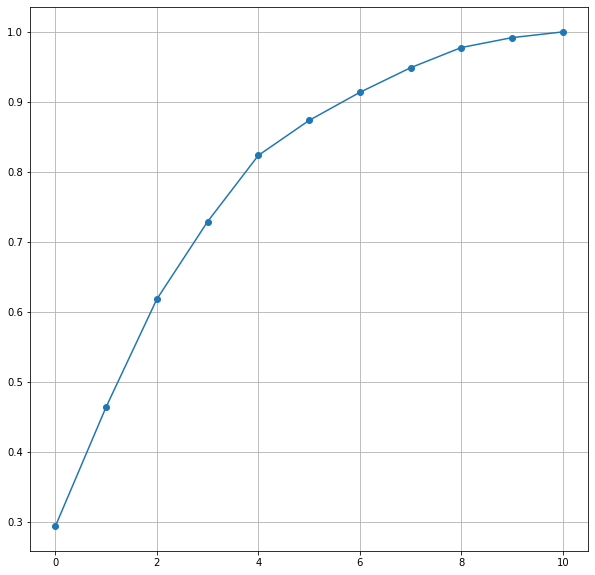

In [434]:
#plot the graph to find the principal components
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'o-')
plt.grid()

In [435]:
pca_new = PCA(n_components=8)
x_new = pca_new.fit_transform(x)

In [436]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# X_train, X_test, Y_train, Y_test = train_test_split(x_new, y, test_size=0.2, random_state=42)
pca = PCA(n_components=8)
_ = pca.fit(X_train)
# pca = PCA(n_components=8)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [437]:
print(X_train.shape, X_test.shape)

(2049, 11) (513, 11)


In [438]:
%%time
classifier = DecisionTree(max_depth=7, min_samples=8)
classifier.fit(X=X_train, Y=Y_train)

Wall time: 2.88 s


In [439]:
classifier.print_tree()

|--- Split Feature Index: 10,  Split Value: 0.2239353224929093
|--- Left Node:
|   |--- Split Feature Index: 1,  Split Value: 0.8960401164152241
|   |--- Left Node:
|   |   |--- Split Feature Index: 0,  Split Value: 1.0761392435077097
|   |   |--- Left Node:
|   |   |   |--- Split Feature Index: 5,  Split Value: -1.188019357588788
|   |   |   |--- Left Node:
|   |   |   |   |--- Split Feature Index: 9,  Split Value: 1.28237398185745
|   |   |   |   |--- Left Node:
|   |   |   |   |   |--- Leaf Node Value: 6
|   |   |   |   |--- Right Node:
|   |   |   |   |   |--- Split Feature Index: 2,  Split Value: 0.23426799243367133
|   |   |   |   |   |--- Left Node:
|   |   |   |   |   |   |--- Leaf Node Value: 7
|   |   |   |   |   |--- Right Node:
|   |   |   |   |   |   |--- Split Feature Index: 0,  Split Value: -0.6361742207920045
|   |   |   |   |   |   |--- Left Node:
|   |   |   |   |   |   |   |--- Leaf Node Value: 8
|   |   |   |   |   |   |--- Right Node:
|   |   |   |   |   |   |   |-

In [440]:
prediction = classifier.predict(X_test)
prediction

array([8, 6, 3, 5, 3, 6, 8, 3, 3, 5, 6, 7, 6, 6, 8, 6, 6, 3, 5, 6, 3, 6,
       8, 4, 3, 5, 7, 7, 6, 6, 8, 5, 5, 7, 5, 5, 6, 4, 7, 5, 8, 3, 6, 8,
       5, 5, 4, 4, 3, 6, 5, 4, 7, 4, 6, 3, 7, 6, 3, 3, 4, 6, 5, 6, 3, 7,
       3, 6, 6, 6, 3, 8, 6, 6, 7, 6, 5, 3, 8, 5, 3, 8, 6, 3, 7, 6, 6, 7,
       6, 6, 6, 6, 3, 3, 4, 7, 7, 3, 3, 4, 8, 8, 8, 7, 4, 7, 6, 8, 7, 3,
       3, 4, 5, 8, 7, 4, 3, 8, 7, 5, 7, 6, 7, 6, 7, 3, 5, 6, 7, 7, 7, 6,
       4, 6, 7, 6, 4, 6, 7, 7, 7, 6, 4, 5, 6, 4, 8, 7, 4, 8, 6, 3, 5, 8,
       6, 3, 4, 8, 3, 3, 5, 5, 5, 5, 7, 7, 4, 3, 7, 6, 3, 6, 6, 4, 5, 7,
       6, 8, 4, 6, 7, 4, 7, 6, 7, 8, 8, 7, 5, 4, 8, 6, 3, 3, 3, 5, 5, 5,
       4, 8, 7, 6, 4, 6, 5, 7, 6, 3, 3, 7, 5, 5, 8, 8, 8, 7, 7, 3, 5, 6,
       6, 8, 4, 5, 6, 4, 7, 7, 4, 3, 3, 8, 5, 3, 7, 6, 7, 3, 6, 7, 7, 3,
       8, 7, 5, 7, 6, 8, 6, 4, 7, 4, 8, 8, 8, 7, 4, 8, 8, 4, 7, 8, 6, 5,
       5, 3, 6, 5, 6, 3, 5, 5, 4, 3, 8, 6, 8, 5, 5, 4, 7, 6, 6, 6, 4, 3,
       8, 6, 4, 6, 5, 6, 4, 6, 8, 8, 5, 6, 6, 4, 4,

In [442]:
metric_results = classifier.get_metric_results(y_test=Y_test, prediction=prediction)
metric_results

{'accuracy': 0.672514619883041,
 'f1_score': 0.675781952606845,
 'precision': 0.6911677683608386,
 'recall': 0.6714685371030553}

In [49]:
grid = {'max_depth': [3, 5, 7, 9],
        'min_samples': [4, 6, 8, 10]}

grid_search_result = classifier.grid_search(grid, X_train, Y_train, X_test, Y_test)  # it's better to be used if test dataset is provided
# grid_search_result = classifier.grid_search(grid, X_train, Y_train)  # it's used when test dataset isn't available
grid_search_result

  0%|          | 0/16 [00:00<?, ?it/s]

C:\Users\ddeng\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


max_depth: 3, min_samples: 4, f1_score: 0.20972905758181828


C:\Users\ddeng\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


max_depth: 3, min_samples: 6, f1_score: 0.20972905758181828


C:\Users\ddeng\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


max_depth: 3, min_samples: 8, f1_score: 0.21164094784120455


C:\Users\ddeng\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


max_depth: 3, min_samples: 10, f1_score: 0.21164094784120455


C:\Users\ddeng\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


max_depth: 5, min_samples: 4, f1_score: 0.2691434468524252


C:\Users\ddeng\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


max_depth: 5, min_samples: 6, f1_score: 0.2733584735976127


C:\Users\ddeng\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


max_depth: 5, min_samples: 8, f1_score: 0.25085788730702224


C:\Users\ddeng\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


max_depth: 5, min_samples: 10, f1_score: 0.27167912080787127


C:\Users\ddeng\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


max_depth: 7, min_samples: 4, f1_score: 0.2667019400352734


C:\Users\ddeng\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


max_depth: 7, min_samples: 6, f1_score: 0.2580087524459252


C:\Users\ddeng\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


max_depth: 7, min_samples: 8, f1_score: 0.2662055066719106


C:\Users\ddeng\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


max_depth: 7, min_samples: 10, f1_score: 0.2481757332359742


C:\Users\ddeng\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


max_depth: 9, min_samples: 4, f1_score: 0.26167959867381835


C:\Users\ddeng\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


max_depth: 9, min_samples: 6, f1_score: 0.2558139534883721


C:\Users\ddeng\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


max_depth: 9, min_samples: 8, f1_score: 0.264520202020202
max_depth: 9, min_samples: 10, f1_score: 0.24417123824451412


C:\Users\ddeng\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'best_f1_score': 0.2733584735976127,
 'history': [],
 'best_max_depth': 5,
 'best_min_samples': 6}

In [50]:
classifier = DecisionTree(max_depth=grid_search_result['best_max_depth'], min_samples=grid_search_result['best_min_samples'])
classifier.fit(X=X_train, Y=Y_train)

#### Try using Catboost

In [443]:
from catboost import Pool, CatBoostClassifier
train_dataset = Pool(data=X_train,
                     label=Y_train,
                     cat_features=[])

eval_dataset = Pool(data=X_test,
                    label=Y_test,
                    cat_features=[])

In [444]:
model = CatBoostClassifier(iterations=4000,
                           learning_rate=0.1,
                           l2_leaf_reg=5,
                           depth=10,
                           use_best_model=True,
                           early_stopping_rounds=300,
                           task_type="GPU",
                           devices='0:1')

# summary = model.select_features(train_dataset,
#                                 eval_set=eval_dataset,
#                                 features_for_select='0-87',
#                                 num_features_to_select=30,
#                                 steps=5,
#                                 train_final_model=True,
#                                 logging_level='Verbose',
#                                 plot=True)
# summary


# Fit model

model.fit(train_dataset, eval_set=eval_dataset, early_stopping_rounds=200, verbose=100, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.6485945	test: 1.6535502	best: 1.6535502 (0)	total: 48ms	remaining: 3m 11s
100:	learn: 0.2255136	test: 0.3780678	best: 0.3780678 (100)	total: 18.7s	remaining: 12m 3s
200:	learn: 0.1235764	test: 0.2977519	best: 0.2977519 (200)	total: 34.2s	remaining: 10m 45s
300:	learn: 0.0829945	test: 0.2694689	best: 0.2694689 (300)	total: 46s	remaining: 9m 24s
400:	learn: 0.0603662	test: 0.2578624	best: 0.2578624 (400)	total: 59.3s	remaining: 8m 52s
500:	learn: 0.0468858	test: 0.2520791	best: 0.2520479 (498)	total: 1m 14s	remaining: 8m 38s
600:	learn: 0.0382931	test: 0.2489397	best: 0.2486873 (599)	total: 1m 29s	remaining: 8m 24s
700:	learn: 0.0323776	test: 0.2466922	best: 0.2463431 (686)	total: 1m 44s	remaining: 8m 10s
800:	learn: 0.0278263	test: 0.2469595	best: 0.2463431 (686)	total: 1m 55s	remaining: 7m 43s
bestTest = 0.2463430661
bestIteration = 686
Shrink model to first 687 iterations.


In [452]:
preds_class = model.predict(eval_dataset)
print(accuracy_score(Y_test.tolist(), preds_class))
print(f1_score(Y_test.tolist(), preds_class, average="macro"))
print(precision_score(Y_test.tolist(), preds_class, average="macro"))
print(recall_score(Y_test.tolist(), preds_class, average="macro")) 

0.9064327485380117
0.9037114264326508
0.902513798909779
0.9056988300828336


#### Try using sklearn DecisionTree

In [457]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train, Y_train.tolist())
prediction = model.predict(X_test)

In [458]:
Y_list = Y_test.tolist()
print(accuracy_score(Y_list, prediction))
print(f1_score(Y_list, prediction, average="macro"))
print(precision_score(Y_list, prediction, average="macro"))
print(recall_score(Y_list, prediction, average="macro"))

0.8674463937621832
0.8616652340196261
0.8588208690922716
0.8678812522033112


## Dataset2: Sentiment-Analysis-On-Movie-Reviews (Multi-class classification)

In [405]:
X_df = read_file('C:/thomas/NYCU_Courses/Third_Semester/Intro_to_Machine_Learning/Term_Project1/Dataset2_Sentiment_Analysis_on_Movie_Reviews/Dataset2_train/X_train.xlsx')
X_df

,Phrase
0,going to a house party and
1,a grand picture
2,lightweight meaning
3,most unpleasant
4,You can see the would-be surprises coming a mi...
...,...
124843,versus
124844,could have been a thinking man 's monster movie
124845,Indian musical
124846,", you get a lot of running around , screaming ..."


In [406]:
Y_df = read_file('C:/thomas/NYCU_Courses/Third_Semester/Intro_to_Machine_Learning/Term_Project1/Dataset2_Sentiment_Analysis_on_Movie_Reviews/Dataset2_train/y_train.xlsx')
Y_df

,Sentiment
0,2
1,4
2,1
3,1
4,1
...,...
124843,2
124844,2
124845,2
124846,2


### Preprocessing using Tokenizer

In [311]:
rus = RandomUnderSampler(random_state=42)
X_resampled_df, Y_resampled_df = rus.fit_resample(X_df, Y_df)
print(Y_df.value_counts())
print(Y_resampled_df.value_counts())

Sentiment
2            63665
3            26342
1            21818
4             7365
0             5658
dtype: int64
Sentiment
0            5658
1            5658
2            5658
3            5658
4            5658
dtype: int64


In [312]:
print(X_resampled_df.shape, Y_resampled_df.shape)
removeNAN(X_resampled_df, Y_resampled_df)
print(X_resampled_df.shape, Y_resampled_df.shape)

(28290, 1) (28290, 1)
NaN indices: []
(28290, 1) (28290, 1)


In [313]:
X_text = preprocess_data(X_resampled_df)
X_text

100%|██████████| 28290/28290 [00:24<00:00, 1133.45it/s]


[['prolonged',
  'boring',
  'n',
  'even',
  'close',
  'barn',
  'burningly',
  'bad',
  'movie',
  'promised',
  'would'],
 ['appalling', 'comedy'],
 ['anything', 'approaching', 'even', 'vague', 'reason', 'sit'],
 ['unintentional', 'giggle', 'several'],
 ['offensive', 'waste', 'time', 'money', 'celluloid'],
 ['intent', 'hammering', 'home', 'message', 'forgets', 'make', 'entertaining'],
 ['story', 'far', 'flung', 'illogical', 'plain', 'stupid'],
 ['loud', 'witless', 'mess'],
 ['overkill', 'highest', 'degree'],
 ['forgiven',
  'realizing',
  'spent',
  'past',
  'minute',
  'looking',
  'watch',
  'waiting',
  'frida',
  'die',
  'already'],
 ['powerfully', 'drawn', 'toward', 'light', 'light', 'exit', 'sign'],
 ['come', 'mind', 'boring'],
 ['leave', 'loser'],
 ['avary',
  'failure',
  'construct',
  'story',
  'even',
  'trace',
  'dramatic',
  'interest'],
 ['would',
  'imagine',
  'searching',
  'quarter',
  'giant',
  'pile',
  'elephant',
  'feces',
  'positively',
  'dreadful'],


In [314]:
Y_dataset = Y_resampled_df.Sentiment.values
X_train, X_test, Y_train, Y_test = train_test_split(X_text, Y_dataset, test_size=0.2, stratify=Y_dataset, random_state=42)

In [315]:
X_train, X_test = tokenizer_preprocess(X_train, X_test)

100%|██████████| 22632/22632 [00:00<00:00, 751611.20it/s]


In [316]:
X_train = np.array(X_train, dtype='object')
X_test = np.array(X_test, dtype='object')
print(X_train.shape, X_test.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(22632, 30) (5658, 30)


(array([[0, 0, 0, ..., 0, 6808, 296],
        [0, 0, 0, ..., 7, 6809, 4415],
        [0, 0, 0, ..., 3230, 2562, 1],
        ...,
        [0, 0, 0, ..., 0, 500, 715],
        [0, 0, 0, ..., 0, 1058, 1204],
        [0, 0, 0, ..., 1409, 1665, 8]], dtype=object),
 array([[0, 0, 0, ..., 92, 10, 1990],
        [0, 0, 0, ..., 53, 307, 52],
        [0, 0, 0, ..., 0, 257, 167],
        ...,
        [0, 0, 0, ..., 1967, 199, 32],
        [0, 0, 0, ..., 785, 2447, 2],
        [0, 0, 0, ..., 1215, 749, 1033]], dtype=object))

In [317]:
unique, counts = np.unique(Y_train, return_counts=True)
print(unique, counts)

[0 1 2 3 4] [4526 4527 4526 4526 4527]


In [322]:
%%time
classifier = DecisionTree(max_depth=9, min_samples=10)
classifier.fit(X=X_train, Y=Y_train)

Wall time: 1min 6s


In [323]:
classifier.print_tree()

|--- Split Feature Index: 27,  Split Value: 0
|--- Left Node:
|   |--- Split Feature Index: 28,  Split Value: 8
|   |--- Left Node:
|   |   |--- Split Feature Index: 29,  Split Value: 3
|   |   |--- Left Node:
|   |   |   |--- Split Feature Index: 1,  Split Value: 0
|   |   |   |--- Left Node:
|   |   |   |   |--- Leaf Node Value: 2
|   |   |   |--- Right Node:
|   |   |   |   |--- Split Feature Index: 0,  Split Value: 0
|   |   |   |   |--- Left Node:
|   |   |   |   |   |--- Leaf Node Value: 3
|   |   |   |   |--- Right Node:
|   |   |   |   |   |--- Split Feature Index: 7,  Split Value: 0
|   |   |   |   |   |--- Left Node:
|   |   |   |   |   |   |--- Split Feature Index: 17,  Split Value: 0
|   |   |   |   |   |   |--- Left Node:
|   |   |   |   |   |   |   |--- Leaf Node Value: 3
|   |   |   |   |   |   |--- Right Node:
|   |   |   |   |   |   |   |--- Split Feature Index: 1,  Split Value: 0
|   |   |   |   |   |   |   |--- Left Node:
|   |   |   |   |   |   |   |   |--- Leaf Nod

In [324]:
prediction = classifier.predict(X_test)
prediction

[0,
 4,
 2,
 2,
 4,
 0,
 4,
 4,
 0,
 2,
 0,
 0,
 2,
 2,
 4,
 0,
 0,
 4,
 0,
 0,
 0,
 4,
 2,
 2,
 0,
 0,
 2,
 0,
 4,
 2,
 0,
 2,
 4,
 0,
 1,
 0,
 4,
 4,
 4,
 4,
 3,
 2,
 3,
 0,
 0,
 4,
 2,
 2,
 2,
 1,
 0,
 4,
 2,
 4,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 4,
 2,
 2,
 2,
 4,
 0,
 2,
 2,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 1,
 4,
 0,
 2,
 4,
 2,
 0,
 2,
 0,
 2,
 3,
 2,
 2,
 1,
 0,
 0,
 4,
 0,
 4,
 2,
 4,
 0,
 0,
 0,
 0,
 2,
 1,
 1,
 1,
 4,
 0,
 4,
 2,
 3,
 4,
 3,
 2,
 2,
 2,
 2,
 4,
 0,
 0,
 4,
 0,
 0,
 2,
 1,
 2,
 4,
 2,
 4,
 4,
 0,
 2,
 2,
 0,
 4,
 2,
 2,
 4,
 0,
 4,
 0,
 2,
 0,
 2,
 4,
 0,
 4,
 2,
 2,
 1,
 2,
 4,
 1,
 2,
 0,
 0,
 2,
 4,
 4,
 4,
 0,
 0,
 0,
 2,
 4,
 2,
 2,
 2,
 0,
 2,
 4,
 0,
 3,
 0,
 4,
 0,
 3,
 4,
 0,
 0,
 4,
 4,
 2,
 2,
 0,
 2,
 0,
 2,
 4,
 3,
 1,
 4,
 2,
 2,
 4,
 0,
 2,
 4,
 4,
 2,
 0,
 0,
 4,
 4,
 4,
 2,
 0,
 4,
 4,
 4,
 2,
 0,
 0,
 4,
 4,
 2,
 2,
 2,
 0,
 0,
 4,
 4,
 0,
 2,
 2,
 4,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,


In [325]:
# train with 1000 records and pca
metric_results = classifier.get_metric_results(Y=Y_test, prediction=prediction)
metric_results

{'accuracy': 0.2785436550017674,
 'f1_score': 0.24293483989185388,
 'precision': 0.2679562297517629,
 'recall': 0.27851474507378005}

In [326]:
report(prediction, Y_test)

Accuracy: 0.2785436550017674
Confusion Matrix:
[[441  98 201  41 351]
 [379  85 345  45 277]
 [260  47 625  36 164]
 [360  59 383  65 265]
 [397  65 244  65 360]]
Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.39      0.30      1132
           1       0.24      0.08      0.11      1131
           2       0.35      0.55      0.43      1132
           3       0.26      0.06      0.09      1132
           4       0.25      0.32      0.28      1131

    accuracy                           0.28      5658
   macro avg       0.27      0.28      0.24      5658
weighted avg       0.27      0.28      0.24      5658



### Preprocessing using TfidfVectorizer

In [407]:
#setup for english language
stemmer = SnowballStemmer(language='english')

In [408]:
#function to create tokenizer
def tokenize(text):
    return [stemmer.stem(token) for token in word_tokenize(text)]

In [409]:
# test tokenize function
tokenize("Hey how are you going")

['hey', 'how', 'are', 'you', 'go']

In [410]:
#creating stopword for engilish language
eng_stopword = stopwords.words('english')

In [411]:
#here are some english stop words
', '.join(eng_stopword)

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [412]:
#creating vectorizer
vectorizer = TfidfVectorizer(tokenizer=tokenize,
                             stop_words = eng_stopword,
                             ngram_range=(1,2),
                             max_features=500)

In [413]:
removeNAN(X_df, Y_df)
vectorizer.fit(X_df.Phrase)

NaN indices: [110917]


C:\Users\ddeng\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'

C:\Users\ddeng\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:401: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.



TfidfVectorizer(max_features=500, ngram_range=(1, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x000001D55E81C168>)

In [414]:
len(vectorizer.vocabulary_)

500

In [415]:
vectorizer.get_feature_names_out()[:100]

array(["'", "'d", "'s", ',', ", 's", ', even', ', film', ', one', '-',
       '--', '-lrb-', '-rrb-', '.', '...', ':', ';', '?', '`', '``',
       'act', 'action', 'actor', 'actual', 'adult', 'adventur', 'age',
       'almost', 'alreadi', 'also', 'alway', 'american', 'amus', 'ani',
       'anim', 'anoth', 'anyon', 'anyth', 'appeal', 'around', 'art',
       'artist', 'attempt', 'audienc', 'away', 'back', 'bad', 'beauti',
       'becaus', 'becom', 'befor', 'begin', 'believ', 'best', 'better',
       'beyond', 'big', 'bit', 'black', 'book', 'bore', 'boy', 'bring',
       'ca', "ca n't", 'call', 'camera', 'care', 'cast', 'certain',
       'chang', 'charact', 'charact ,', 'charm', 'children', 'cinema',
       'cinemat', 'classic', 'clear', 'clever', 'clich', 'close', 'color',
       'come', 'comedi', 'comic', 'compel', 'complet', 'complex',
       'contriv', 'convinc', 'could', 'creat', 'creativ', 'crime',
       'cultur', 'cut', 'dark', 'day', 'de', 'dead'], dtype=object)

In [416]:
X_dataset = vectorizer.transform(X_df.Phrase)
X_dataset.shape

(124847, 500)

In [417]:
Y_dataset = Y_df.Sentiment.values
X_train, X_test, Y_train, Y_test = train_test_split(X_dataset, Y_dataset, test_size=0.2, stratify=Y_dataset, random_state=42)

In [418]:
X_train = X_train.toarray()
X_test = X_test.toarray()

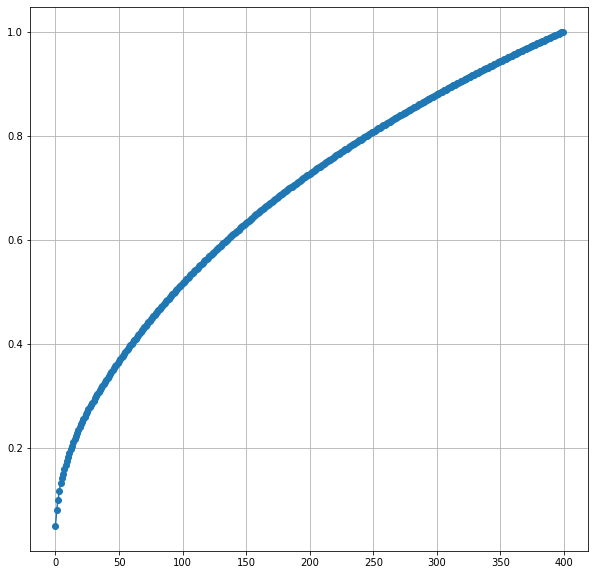

In [341]:
#plot the graph to find the principal components
pca = PCA(n_components=400)
_ = pca.fit(X_train)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'o-')
plt.grid()

In [419]:
# choose n_components=400 because it's close to 0.9
pca = PCA(n_components=400)
_ = pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
X_train.shape, X_test.shape

((99877, 400), (24970, 400))

In [420]:
%%time
classifier = DecisionTree(max_depth=7, min_samples=10)
classifier.fit(X=X_train[:1000], Y=Y_train[:1000])

Wall time: 29.1 s


In [421]:
classifier.print_tree()

|--- Split Feature Index: 2,  Split Value: -0.03070178172662224
|--- Left Node:
|   |--- Split Feature Index: 354,  Split Value: 0.019787033091051617
|   |--- Left Node:
|   |   |--- Split Feature Index: 39,  Split Value: -0.013726107121159029
|   |   |--- Left Node:
|   |   |   |--- Split Feature Index: 246,  Split Value: -0.02333770131269835
|   |   |   |--- Left Node:
|   |   |   |   |--- Split Feature Index: 309,  Split Value: -0.007908338287751686
|   |   |   |   |--- Left Node:
|   |   |   |   |   |--- Leaf Node Value: 3.0
|   |   |   |   |--- Right Node:
|   |   |   |   |   |--- Split Feature Index: 25,  Split Value: -0.0028983131778091004
|   |   |   |   |   |--- Left Node:
|   |   |   |   |   |   |--- Leaf Node Value: 2.0
|   |   |   |   |   |--- Right Node:
|   |   |   |   |   |   |--- Split Feature Index: 1,  Split Value: -0.04270232262798626
|   |   |   |   |   |   |--- Left Node:
|   |   |   |   |   |   |   |--- Leaf Node Value: 1.0
|   |   |   |   |   |   |--- Right Node:

In [422]:
prediction = classifier.predict(X_test)
prediction

array([0., 2., 3., ..., 2., 0., 2.])

In [423]:
# train with 1000 records and pca
metric_results = classifier.get_metric_results(y_test=Y_test, prediction=prediction)
metric_results

{'accuracy': 0.4366039247096516,
 'f1_score': 0.23987512583735002,
 'precision': 0.2506323421804849,
 'recall': 0.24516094751889944}

In [128]:
# train with all records and pca records
metric_results = classifier.get_metric_results(y_test=Y_test, prediction=prediction)
metric_results

{'accuracy': 0.5324789747697237,
 'f1_score': 0.26614942601498925,
 'precision': 0.3711297641768867,
 'recall': 0.27071501688753163}

In [129]:
classifier.report(y_test=Y_test, prediction=prediction)

Accuracy: 0.5324789747697237
Confusion Matrix:
[[   14   233   685   183    17]
 [   18   548  3247   533    18]
 [   16   481 11197   988    51]
 [    7   354  3368  1446    93]
 [    5   134   664   579    91]]
Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.01      0.02      1132
           1       0.31      0.13      0.18      4364
           2       0.58      0.88      0.70     12733
           3       0.39      0.27      0.32      5268
           4       0.34      0.06      0.10      1473

    accuracy                           0.53     24970
   macro avg       0.37      0.27      0.27     24970
weighted avg       0.46      0.53      0.46     24970



In [307]:
# baseline with all predictions as '2'
metric_results = classifier.get_metric_results(y_test=Y_test, prediction=[2]*(len(Y_test)))
metric_results

C:\Users\ddeng\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



{'accuracy': 0.5099319183019624,
 'f1_score': 0.13508739357610802,
 'precision': 0.10198638366039248,
 'recall': 0.2}

In [351]:
grid = {'max_depth': [3, 5, 7, 9],
        'min_samples': [10]}

grid_search_result = classifier.grid_search(grid, X_train[:1000], Y_train[:1000], X_test, Y_test)  # it's better to be used if test dataset is provided
# grid_search_result = classifier.grid_search(grid, X_train, Y_train)  # it's used when test dataset isn't available
grid_search_result

  0%|          | 0/4 [00:00<?, ?it/s]

C:\Users\ddeng\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



max_depth: 3, min_samples: 10, f1_score: 0.20516246561269003
max_depth: 5, min_samples: 10, f1_score: 0.23572072302462135
max_depth: 7, min_samples: 10, f1_score: 0.23987512583735002
max_depth: 9, min_samples: 10, f1_score: 0.23647834860027478


{'best_f1_score': 0.23987512583735002,
 'history': [{'max_depth': 3,
   'min_samples': 10,
   'accuracy': 0.4929515418502203,
   'f1_score': 0.20516246561269003,
   'precision': 0.21700249039205893,
   'recall': 0.22948912163714175},
  {'max_depth': 5,
   'min_samples': 10,
   'accuracy': 0.47400881057268723,
   'f1_score': 0.23572072302462135,
   'precision': 0.25431035783622213,
   'recall': 0.2443338535373601},
  {'max_depth': 7,
   'min_samples': 10,
   'accuracy': 0.4366039247096516,
   'f1_score': 0.23987512583735002,
   'precision': 0.2506323421804849,
   'recall': 0.24516094751889944},
  {'max_depth': 9,
   'min_samples': 10,
   'accuracy': 0.4358029635562675,
   'f1_score': 0.23647834860027478,
   'precision': 0.2485098795033332,
   'recall': 0.23846407566636815}],
 'best_max_depth': 7,
 'best_min_samples': 10}

#### Try using Catboost

In [356]:
from catboost import Pool, CatBoostClassifier
train_dataset = Pool(data=X_train,
                     label=Y_train,
                     cat_features=[])

eval_dataset = Pool(data=X_test,
                    label=Y_test,
                    cat_features=[])

In [357]:
model = CatBoostClassifier(iterations=4000,
                           learning_rate=0.1,
                           l2_leaf_reg=5,
                           depth=10,
                           use_best_model=True,
                           early_stopping_rounds=300,
                           task_type="GPU",
                           devices='0:1')

# summary = model.select_features(train_dataset,
#                                 eval_set=eval_dataset,
#                                 features_for_select='0-87',
#                                 num_features_to_select=30,
#                                 steps=5,
#                                 train_final_model=True,
#                                 logging_level='Verbose',
#                                 plot=True)
# summary


# Fit model

model.fit(train_dataset, eval_set=eval_dataset, early_stopping_rounds=200, verbose=100, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.5259034	test: 1.5284792	best: 1.5284792 (0)	total: 654ms	remaining: 43m 36s
100:	learn: 1.0119708	test: 1.0980637	best: 1.0980637 (100)	total: 49.8s	remaining: 32m
200:	learn: 0.9279394	test: 1.0713167	best: 1.0713167 (200)	total: 1m 38s	remaining: 31m 2s
300:	learn: 0.8709344	test: 1.0606607	best: 1.0606607 (300)	total: 2m 27s	remaining: 30m 11s
400:	learn: 0.8306834	test: 1.0560366	best: 1.0560366 (400)	total: 3m 15s	remaining: 29m 11s
500:	learn: 0.7980427	test: 1.0550931	best: 1.0550105 (472)	total: 4m 3s	remaining: 28m 21s
600:	learn: 0.7729099	test: 1.0568909	best: 1.0550105 (472)	total: 4m 51s	remaining: 27m 26s
bestTest = 1.055010544
bestIteration = 472
Shrink model to first 473 iterations.


In [358]:
preds_class = model.predict(eval_dataset)
print(accuracy_score(Y_test, preds_class))
print(f1_score(Y_test, preds_class, average="macro"))
print(precision_score(Y_test, preds_class, average="macro"))
print(recall_score(Y_test, preds_class, average="macro")) 

0.5957148578293953
0.41941409919218825
0.5214095302300145
0.3874396226766833


#### Try using sklearn DecisionTree

In [359]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train, Y_train)
prediction = model.predict(X_test)

In [360]:
Y_list = Y_test.tolist()
print(accuracy_score(Y_list, prediction))
print(f1_score(Y_list, prediction, average="macro"))
print(precision_score(Y_list, prediction, average="macro"))
print(recall_score(Y_list, prediction, average="macro"))

0.5541049259110933
0.37900398973289023
0.41307162329275365
0.3653984285382116


## Banknote dataset

In [118]:
# http://archive.ics.uci.edu/ml/datasets/banknote+authentication#
df = pd.read_csv('data_banknote_authentication.txt', header = None )
dataset = np.array(df, dtype='object')
X_train, X_test, Y_train, Y_test = train_test_split(dataset[:, :-1], dataset[:, -1], test_size=0.2, random_state=42)
df

,0,1,2,3,4
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [119]:
classifier = DecisionTree(max_depth=7, min_samples=8)
classifier.fit(X=X_train, Y=Y_train)

In [120]:
classifier.print_tree()

|--- Split Feature Index: 0,  Split Value: 0.30081
|--- Left Node:
|   |--- Split Feature Index: 1,  Split Value: 5.1401
|   |--- Left Node:
|   |   |--- Split Feature Index: 2,  Split Value: 6.7019
|   |   |--- Left Node:
|   |   |   |--- Split Feature Index: 1,  Split Value: 4.0723
|   |   |   |--- Left Node:
|   |   |   |   |--- Split Feature Index: 0,  Split Value: -0.27068
|   |   |   |   |--- Left Node:
|   |   |   |   |   |--- Split Feature Index: 0,  Split Value: -4.0679
|   |   |   |   |   |--- Left Node:
|   |   |   |   |   |   |--- Leaf Node Value: 1.0
|   |   |   |   |   |--- Right Node:
|   |   |   |   |   |   |--- Split Feature Index: 0,  Split Value: -2.0754
|   |   |   |   |   |   |--- Left Node:
|   |   |   |   |   |   |   |--- Leaf Node Value: 1.0
|   |   |   |   |   |   |--- Right Node:
|   |   |   |   |   |   |   |--- Leaf Node Value: 1.0
|   |   |   |   |--- Right Node:
|   |   |   |   |   |--- Split Feature Index: 0,  Split Value: -0.11716
|   |   |   |   |   |---

In [121]:
prediction = classifier.predict(X_test)
prediction

[1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0

In [122]:
metric_results = classifier.get_metric_results(Y=Y_test, prediction=prediction)
metric_results

{'accuracy': 0.9709090909090909,
 'f1_score': 0.9703727644904114,
 'precision': 0.969489247311828,
 'recall': 0.9713645687142394}

In [103]:
grid = {'max_depth': [3, 5, 7, 9],
        'min_samples': [4, 6, 8, 10]}

grid_search_result = classifier.grid_search(grid, X_train, Y_train, X_test, Y_test)  # it's better to be used if test dataset is provided
# grid_search_result = classifier.grid_search(grid, X_train, Y_train)  # it's used when test dataset isn't available
grid_search_result

  0%|          | 0/16 [00:00<?, ?it/s]

max_depth: 3, min_samples: 4, f1_score: 0.9287380150298006
max_depth: 3, min_samples: 6, f1_score: 0.9287380150298006
max_depth: 3, min_samples: 8, f1_score: 0.9287380150298006
max_depth: 3, min_samples: 10, f1_score: 0.9287380150298006
max_depth: 5, min_samples: 4, f1_score: 0.9592213639611221
max_depth: 5, min_samples: 6, f1_score: 0.9556451612903225
max_depth: 5, min_samples: 8, f1_score: 0.9593790704857055
max_depth: 5, min_samples: 10, f1_score: 0.9441518528045925
max_depth: 7, min_samples: 4, f1_score: 0.9702477550578816
max_depth: 7, min_samples: 6, f1_score: 0.9666356614227363
max_depth: 7, min_samples: 8, f1_score: 0.9703727644904114
max_depth: 7, min_samples: 10, f1_score: 0.9441518528045925
max_depth: 9, min_samples: 4, f1_score: 0.9702477550578816
max_depth: 9, min_samples: 6, f1_score: 0.9666356614227363
max_depth: 9, min_samples: 8, f1_score: 0.9703727644904114
max_depth: 9, min_samples: 10, f1_score: 0.9441518528045925


{'best_f1_score': 0.9703727644904114,
 'history': [],
 'best_max_depth': 7,
 'best_min_samples': 8}

In [ ]:
classifier = DecisionTree(max_depth=grid_search_result['best_max_depth'], min_samples=grid_search_result['best_min_samples'])
classifier.fit(X=X_train, Y=Y_train)